In [ ]:
# importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# importing the data and nurture segment
mba_df = pd.read_csv('../data/processed_data/cleaned_data.csv')
nurture_ids = pd.read_csv('../data/processed_data/nurture_ids.csv', header=None).squeeze().values
nurture_customers = mba_df[mba_df['CustomerID'].isin(nurture_ids)]

In [3]:
nurture_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52446 entries, 165 to 396233
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    52446 non-null  int64  
 1   StockCode    52446 non-null  object 
 2   Description  52446 non-null  object 
 3   Quantity     52446 non-null  int64  
 4   InvoiceDate  52446 non-null  object 
 5   UnitPrice    52446 non-null  float64
 6   CustomerID   52446 non-null  float64
 7   Country      52446 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 3.6+ MB


So dataset imported is as expected !! <br>
Let us see the distinct number of products we have:

In [4]:
nurture_customers['Description'].nunique()

3220

In [5]:
# Group by InvoiceNo and aggregate product Description into list to create a basket
mybasket = nurture_customers.groupby('InvoiceNo')['Description'].apply(list)
mybasket.head(5)

InvoiceNo
536385    [SET 3 WICKER OVAL BASKETS W LIDS, JAM MAKING ...
536392    [3 STRIPEY MICE FELTCRAFT, SET OF 6 SOLDIER SK...
536415    [60 CAKE CASES VINTAGE CHRISTMAS, PAPER CHAIN ...
536416    [ROTATING LEAVES T-LIGHT HOLDER, RED  HARMONIC...
536508    [ANTIQUE SILVER TEA GLASS ENGRAVED, AGED GLASS...
Name: Description, dtype: object

In [6]:
len(mybasket)

2513

- **TransactionEncoder()** will be used to convert this basket into an array, this is very similar to one-hot encoding.
- We need to do this because the "apriori" algorithm accepts the input in this form only.
- Then we will get the most frequentist itemsets as an output of the algorithm. 
- We need to set a **minimum support threshold**, which we will keep at min_support = 0.01 (1%) for now.

In [7]:
te = TransactionEncoder() # defining the encoder object
te_array = te.fit(mybasket).transform(mybasket)
basket_df = pd.DataFrame(te_array,columns = te.columns_ , index=mybasket.index)
basket_df.head(5)

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,...,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536385,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536415,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
536416,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536508,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# Apply Apriori algorithm to find out the most frequent itemsets with support ≥ 0.01
frequent_itemsets = apriori(basket_df, min_support=0.01, use_colnames=True)
# frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

In [9]:
len(frequent_itemsets)

759

In [10]:
frequent_itemsets.head(5)

,support,itemsets
0,0.010346,( 50'S CHRISTMAS GIFT BAG LARGE)
1,0.013928,(10 COLOUR SPACEBOY PEN)
2,0.019101,(12 MESSAGE CARDS WITH ENVELOPES)
3,0.018305,(12 PENCIL SMALL TUBE WOODLAND)
4,0.020294,(12 PENCILS SMALL TUBE RED RETROSPOT)


In [11]:
# the top 20 most frequent itemsets
frequent_itemsets_top_20 = frequent_itemsets.sort_values('support',ascending=False).head(20)
frequent_itemsets_top_20

,support,itemsets
584,0.085953,(WHITE HANGING HEART T-LIGHT HOLDER)
45,0.077596,(ASSORTED COLOUR BIRD ORNAMENT)
428,0.076005,(REX CASH+CARRY JUMBO SHOPPER)
356,0.071628,(PAPER CHAIN KIT 50'S CHRISTMAS )
415,0.069638,(REGENCY CAKESTAND 3 TIER)
51,0.068046,(BAKING SET 9 PIECE RETROSPOT )
360,0.056904,(PARTY BUNTING)
227,0.055312,(HEART OF WICKER SMALL)
263,0.054119,(JUMBO BAG RED RETROSPOT)
473,0.052129,(SET OF 3 CAKE TINS PANTRY DESIGN )


- No itemsets with two or more items were in the top 20.
- So let us look at the top pairs and top triplets(if any)

In [12]:
# top pairs in the frequent itemsets 
top_pairs = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)].sort_values('support',ascending=False)
top_pairs

,support,itemsets
749,0.035814,"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN HE..."
751,0.025468,"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN TR..."
707,0.024274,"(PAPER CHAIN KIT VINTAGE CHRISTMAS, PAPER CHAI..."
750,0.022682,"(WOODEN HEART CHRISTMAS SCANDINAVIAN, WOODEN T..."
626,0.021488,"(BAKING SET 9 PIECE RETROSPOT , BAKING SET SPA..."
...,...,...
657,0.010346,"(HAND WARMER OWL DESIGN, HAND WARMER RED RETRO..."
678,0.010346,"(RED KITCHEN SCALES, IVORY KITCHEN SCALES)"
716,0.010346,"(PLASTERS IN TIN STRONGMAN, PLASTERS IN TIN VI..."
718,0.010346,"(PLASTERS IN TIN WOODLAND ANIMALS, PLASTERS IN..."


In [13]:
# top triplets in the frequent itemsets 
top_triplets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 3)].sort_values('support',ascending=False)
top_triplets

,support,itemsets
758,0.020692,"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN HE..."
752,0.014723,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC..."
753,0.012336,"(HAND WARMER BIRD DESIGN, HAND WARMER SCOTTY D..."
754,0.012336,"(SET OF 12 MINI LOAF BAKING CASES, SET OF 6 SN..."
757,0.012336,"(SET OF 12 MINI LOAF BAKING CASES, SET OF 6 TE..."
755,0.011142,"(SET OF 12 MINI LOAF BAKING CASES, SET OF 6 TE..."
756,0.010346,"(SET OF 6 TEA TIME BAKING CASES, SET OF 6 SNAC..."


In [14]:
# top quadruplets in the frequent itemsets 
top_quadruplets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 4)].sort_values('support',ascending=False)
top_quadruplets

,support,itemsets


**So we got 133 itemsets having two pairs, only 7 itemsets with three items and no itemsets with four or above items in the frequent-itemsets data.(support >= 0.01)**

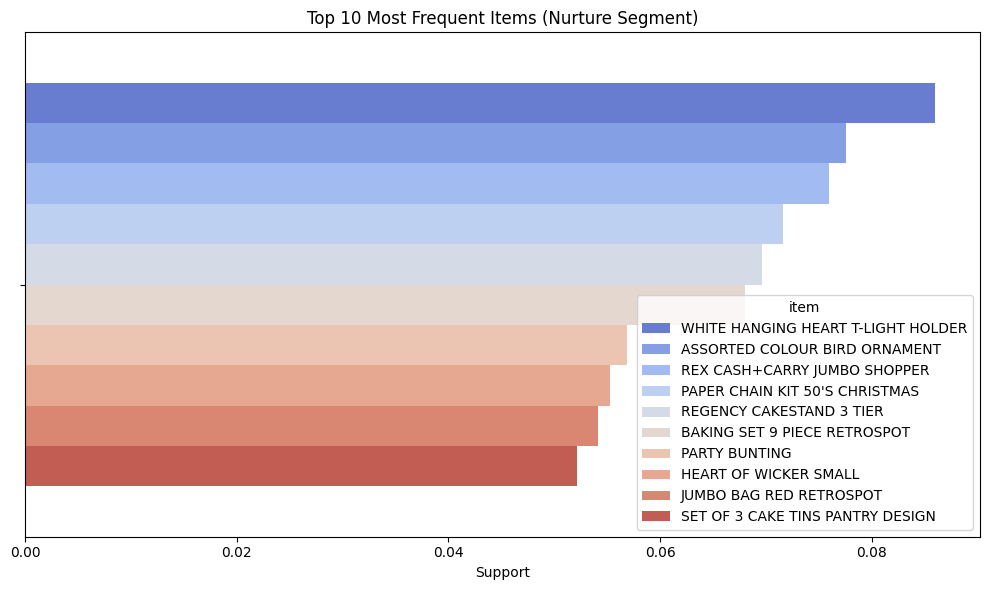

In [15]:
# lets us visualise the top-10 itemsets i.e. top-10 items (both are same here)
top_items = frequent_itemsets.sort_values(by = 'support',ascending = False).head(10).copy()
top_items['item'] = top_items['itemsets'].apply(lambda x: list(x)[0])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_items, hue='item', x='support', palette='coolwarm')
plt.title('Top 10 Most Frequent Items (Nurture Segment)')
plt.xlabel('Support')
plt.ylabel('')
plt.tight_layout()
plt.show()

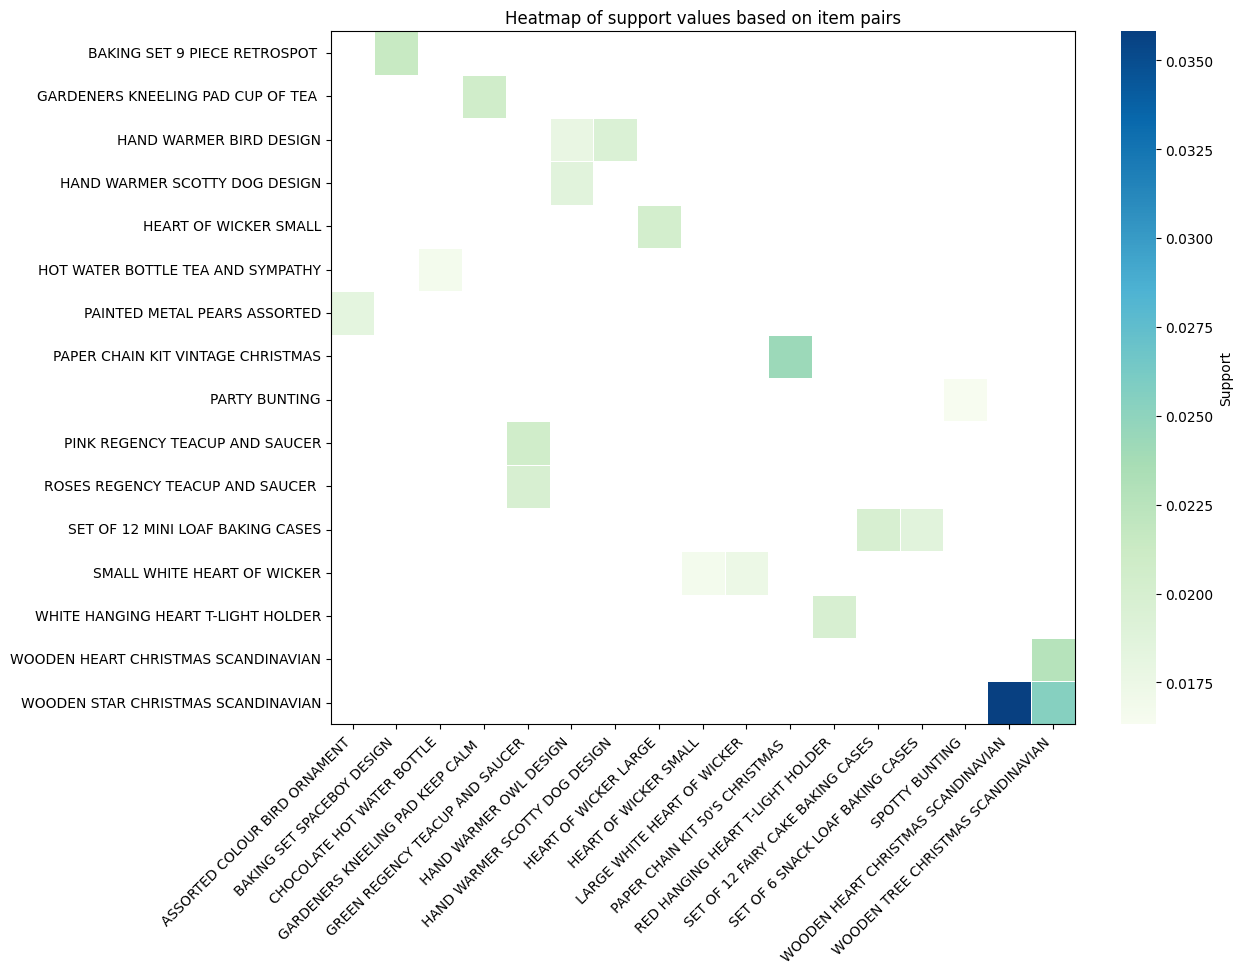

In [ ]:
# let us look more at the pairs
# top 10 pairs
top_10_pairs = top_pairs.head(20).copy()

# creating a modified dataframe
top_10_pairs['Item1'] = top_10_pairs['itemsets'].apply(lambda x: list(x)[0])
top_10_pairs['Item2'] = top_10_pairs['itemsets'].apply(lambda x: list(x)[1])

heatmap_pair_data = pd.crosstab(
    top_10_pairs['Item1'],
    top_10_pairs['Item2'],
    values = top_10_pairs['support'],
    aggfunc='mean',dropna = True)

# plotting the heatmap
plt.figure(figsize=(12,9))
sns.heatmap(heatmap_pair_data,cmap = 'GnBu',annot = False,fmt = '.1f',cbar_kws = {'label':'Support'},linewidths = 0.5)
plt.title('Heatmap of support values based on item pairs')
plt.xticks(rotation = 45,ha = 'right')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.xlabel('')
plt.ylabel('')
plt.show()

Now we will generate the rules and the **minimum threshold** for confidence is 0.6 or 60%.

In [ ]:
# Generate rules using frequent_itemsets DataFrame
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules = rules[
    (rules['lift'] >= 2.5) &
    (rules['confidence'] >= 0.6) &
    (rules['support'] >= 0.01)
]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(PAINTED METAL PEARS ASSORTED),(ASSORTED COLOUR BIRD ORNAMENT),0.026263,0.077596,0.018305,0.696970,8.981974,1.0,0.016267,3.043932,0.912635,0.213953,0.671478,0.466434
1,(BAKING SET SPACEBOY DESIGN),(BAKING SET 9 PIECE RETROSPOT ),0.026263,0.068046,0.021488,0.818182,12.023923,1.0,0.019701,5.125746,0.941561,0.295082,0.804906,0.566986
2,(PINK HAPPY BIRTHDAY BUNTING),(BLUE HAPPY BIRTHDAY BUNTING),0.015121,0.013132,0.011142,0.736842,56.111643,1.0,0.010943,3.750099,0.997258,0.651163,0.733340,0.792663
3,(BLUE HAPPY BIRTHDAY BUNTING),(PINK HAPPY BIRTHDAY BUNTING),0.013132,0.015121,0.011142,0.848485,56.111643,1.0,0.010943,6.500199,0.995248,0.651163,0.846159,0.792663
4,(CHILDRENS CUTLERY SPACEBOY ),(CHILDRENS CUTLERY DOLLY GIRL ),0.017509,0.015917,0.011938,0.681818,42.835227,1.0,0.011659,3.092832,0.994060,0.555556,0.676672,0.715909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,"(SET OF 12 MINI LOAF BAKING CASES, SET OF 6 SN...",(SET OF 6 TEA TIME BAKING CASES),0.018703,0.028253,0.012336,0.659574,23.345220,1.0,0.011807,2.854507,0.975407,0.356322,0.649677,0.548097
60,"(SET OF 6 TEA TIME BAKING CASES, SET OF 6 SNAC...",(SET OF 12 MINI LOAF BAKING CASES),0.015121,0.031039,0.012336,0.815789,26.283063,1.0,0.011867,5.260076,0.976722,0.364706,0.809889,0.606613
61,"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN TR...",(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.025468,0.048150,0.020692,0.812500,16.874483,1.0,0.019466,5.076535,0.965323,0.390977,0.803015,0.621126
62,"(WOODEN HEART CHRISTMAS SCANDINAVIAN, WOODEN T...",(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.022682,0.048150,0.020692,0.912281,18.946788,1.0,0.019600,10.851094,0.969204,0.412698,0.907843,0.671016


So we have got 64 rules for this frequent_itemsets.

In [27]:
# Clean frozensets
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(sorted(list(x))))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(sorted(list(x))))

In [34]:
# top 10 rules,sorted by lift
top_rules = rules.sort_values(by='lift', ascending=False).head(10).copy()

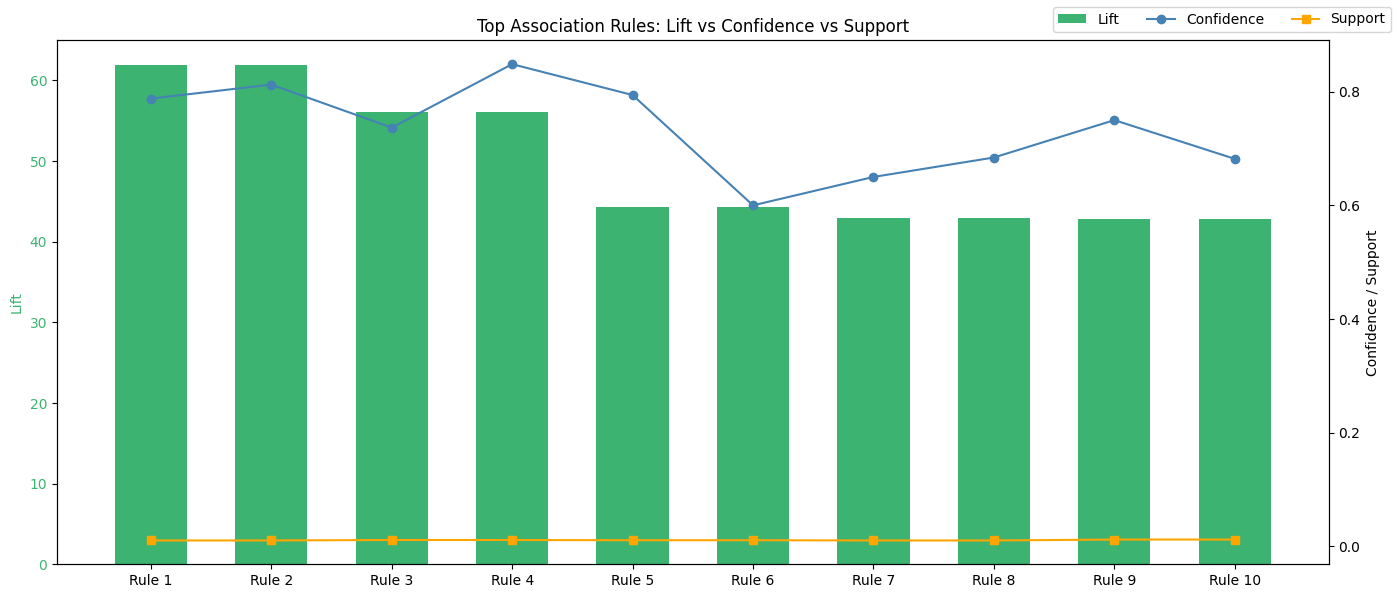

Rule Legend:
Rule 1: SET/10 PINK POLKADOT PARTY CANDLES → SET/10 BLUE POLKADOT PARTY CANDLES
Rule 2: SET/10 BLUE POLKADOT PARTY CANDLES → SET/10 PINK POLKADOT PARTY CANDLES
Rule 3: PINK HAPPY BIRTHDAY BUNTING → BLUE HAPPY BIRTHDAY BUNTING
Rule 4: BLUE HAPPY BIRTHDAY BUNTING → PINK HAPPY BIRTHDAY BUNTING
Rule 5: POPPY'S PLAYHOUSE LIVINGROOM  → POPPY'S PLAYHOUSE BEDROOM 
Rule 6: POPPY'S PLAYHOUSE BEDROOM  → POPPY'S PLAYHOUSE LIVINGROOM 
Rule 7: GLASS APOTHECARY BOTTLE PERFUME → GLASS APOTHECARY BOTTLE TONIC
Rule 8: GLASS APOTHECARY BOTTLE TONIC → GLASS APOTHECARY BOTTLE PERFUME
Rule 9: CHILDRENS CUTLERY DOLLY GIRL  → CHILDRENS CUTLERY SPACEBOY 
Rule 10: CHILDRENS CUTLERY SPACEBOY  → CHILDRENS CUTLERY DOLLY GIRL 


In [ ]:
# readable rule strings
top_rules['rule'] = top_rules.apply(
    lambda row: f"{row['antecedents']} → {row['consequents']}",
    axis=1
)

# rule labels like Rule 1, Rule 2, ...
top_rules['rule_id'] = ['Rule ' + str(i+1) for i in range(len(top_rules))]

# mapping dictionary
rule_mapping = dict(zip(top_rules['rule_id'], top_rules['rule']))

# plotting
x = np.arange(len(top_rules))
width = 0.6

fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar plot for Lift (left Y-axis)
bars = ax1.bar(x, top_rules['lift'], color='mediumseagreen', width=width, label='Lift')
ax1.set_ylabel('Lift', color='mediumseagreen')
ax1.tick_params(axis='y', labelcolor='mediumseagreen')
ax1.set_xticks(x)
ax1.set_xticklabels(top_rules['rule_id'], rotation=0)

# Secondary Y-axis for Confidence and Support
ax2 = ax1.twinx()
ax2.plot(x, top_rules['confidence'], color='steelblue', marker='o', label='Confidence')
ax2.plot(x, top_rules['support'], color='orange', marker='s', label='Support')
ax2.set_ylabel('Confidence / Support')
ax2.tick_params(axis='y')

# Legends
lines_labels = [ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, ncol=3)

plt.title('Top Association Rules: Lift vs Confidence vs Support')
plt.tight_layout()
plt.show()

# Display mapping of Rule # to full rule string
print("Rule Legend:")
for k, v in rule_mapping.items():
    print(f"{k}: {v}")
